# Homework 8: Magnetization, Energy in the Ising Model

Physics 177, Spring 2017 (Prof. Tanedo)  
Due: Friday, June 16    

Kevin Bleich

# Problem 0

Please be sure to fill out:
1. The course survey (e-mailed directly to you; e-mail Prof. Tanedo if you have not received this!)
2. iEval course evaluation (http://ieval.ucr.edu)
3. Sign up for a "final interview": https://doodle.com/poll/xyb7dgcupq9gwaqm

# Problem 1

Code the Ising model to study the phase transition at $T_c\approx 2.27$ (in units where $J = k_B = 1$). Use the Metropolis algorithm for Markov Chain Monte Carlo, as we set up in Lecture 18: https://github.com/Physics177-2017/Lec18-Ising-Model/blob/master/Lec18-IsingModel.ipynb

**Make the following plots:**
1. Magnetization as a function of temperature
2. Energy as a function of temperature

You may define magnetization as the total spin of the system (sum of the spins of each node). You may define the energy as the sum of $\Delta E_i$ for each spin $i$. Recall that 

$$\Delta E_i = -\sum_{j} s_is_j$$

(Note: actually, you should define $E = \sum_i \Delta E_i/4$, but we don't care about the overall pre-factors, we just want to see the qualitative shapes of the plots.)

**Guidelines**
You should be able to get reasonable results for:
* A $20\times 20$ array.
* Sampling 1000 temperature points between $T=1$ and $T=4$
* Allowing 2000 Monte Carlo steps to draw a sample.

*Pro-tip:* One way to improve your calculations is to let your Monte Carlo "equilibrate" before recording data. In other words, your Markov Chain algorithm should be:

1. Pick a random configuration
2. Run for 2000 steps (without recording data)
3. Perform your Markov Chain algorithm as usual, using the configuration at the end of step 2 as your initial configuration.


Code this up on your own, you may use the code from Lecture 18 as a starting point. 

The *answers* are available in a notebook written by Rajesh Singh:
http://rajeshrinet.github.io/blog/2014/ising-model/
... you may use that notebook (in particular, the plots) as a guideline for what your code should produce. 

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand


def makeGrid(N):
    grid = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            grid[i,j] = 2*rand.randint(0,1) - 1 
    return grid
        
def new_spin(some_grid, beta):
    """
    Takes the grid and the temperature,
    runs Metropolis algorithm to give the
    updated value of the (i,j) element.
    """
    for i in range(N):
        for j in range(N):
    
            a = np.random.randint(0, N)
            b = np.random.randint(0, N)
    
            spin = some_grid[a,b]
            spin_flip = -spin
    
            net_neighbor_spin = \
                some_grid[(a+1)%N,b] + \
                some_grid[(a-1)%N,b] + \
                some_grid[a,(b+1)%N] + \
                some_grid[a,(b-1)%N]

            deltaE = spin*net_neighbor_spin/4 - \
                     (-spin*net_neighbor_spin/4)



            if deltaE < 0:
                spin*= -1

            elif rand.random() < np.exp(-beta*deltaE):
                spin*= -1
                
    return some_grid
                


    
def Energy_tot(some_grid):
    E = 0
    for i in range(len(some_grid)): 
        for j in range(len(some_grid)):
            spin = some_grid[i,j]
            
            net_neighbor_spin = \
                some_grid[(i+1)%N,j] + \
                some_grid[(i-1)%N,j] + \
                some_grid[i,(j+1)%N] + \
                some_grid[i,(j-1)%N]
            
            E += -net_neighbor_spin * spin
    return E/4

def Magnetization_tot(some_grid):
    mag = np.sum(some_grid)
    return mag


In [28]:
nt      = 200       
N       = 20         
pre_run = 200      
trials  = 200  

T              = np.linspace(1, 4, nt)        
Energy         = np.zeros(nt)
Magnetization  = np.zeros(nt)

for m in range(len(T)):
    E1 = M1 = 0
    config = makeGrid(N)
    
    for i in range(pre_run):
        new_spin(config, 1.0/T[m])

    for i in range(trials):
        new_spin(config, 1.0/T[m])        
        Ene = Energy_tot(config)        
        Mag = Magnetization_tot(config)          

        E1 += Ene
        M1 += Mag
        
        Energy[m]         = E1/(trials*N*N)
        Magnetization[m]  = M1/(trials*N*N)
        


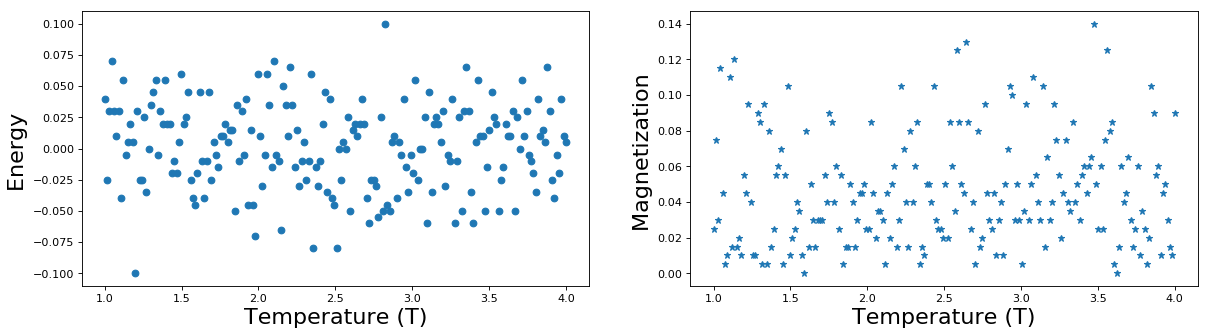

In [29]:
f = plt.figure(figsize=(18, 10), dpi=80);    

sp =  f.add_subplot(2, 2, 1 );
plt.plot(T, Energy, 'o', label=' Energy');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);

sp =  f.add_subplot(2, 2, 2 );
plt.plot(T, abs(Magnetization), '*', label='Magnetization');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Magnetization ", fontsize=20);
plt.show()